# Probability distributions
## Uniform distribution

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

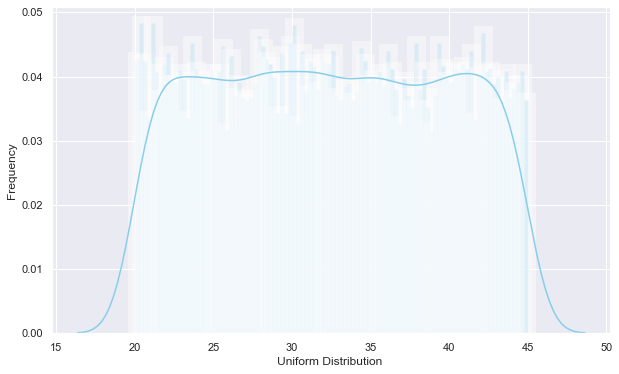

In [4]:
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,6)})

from scipy.stats import uniform
number = 10000
start = 20
width = 25

uniform_data = uniform.rvs(size=number, loc=start, scale=width)
axis = sns.distplot(uniform_data, bins=100, kde=True, color='skyblue', hist_kws={"linewidth": 15})
axis.set(xlabel='Uniform Distribution ', ylabel='Frequency')

## Normal (Gaussian) distribution

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

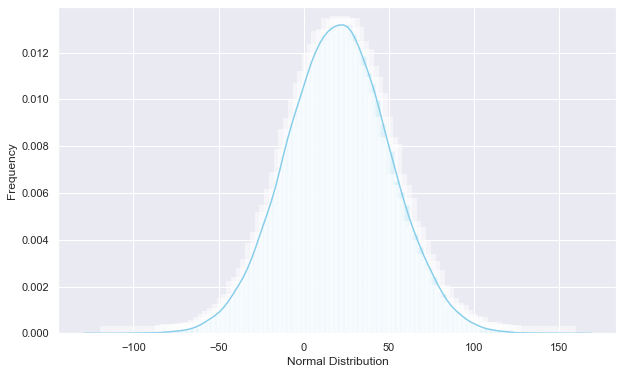

In [7]:
from scipy.stats import norm

normal_data = norm.rvs(size=90000,loc=20,scale=30)
axis = sns.distplot(normal_data, bins=100, kde=True, color='skyblue', hist_kws={"linewidth": 15,'alpha':0.568})
axis.set(xlabel='Normal Distribution', ylabel='Frequency')

## Exponential distribution

A process in which some events occur continuously and independently at a constant average rate is referred to as a Poisson point process. The exponential distribution describes the time between events in such a Poisson point process.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

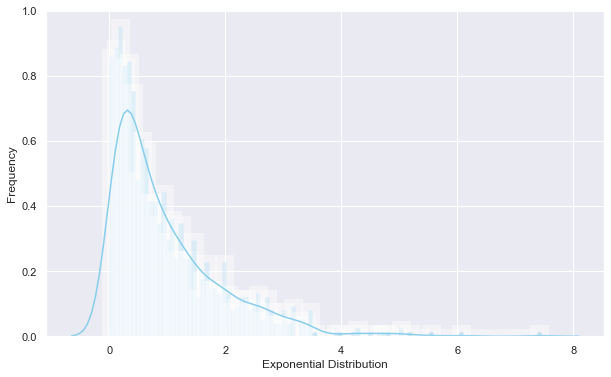

In [8]:
# Exponential distribution
from scipy.stats import expon

expon_data = expon.rvs(scale=1,loc=0,size=1000)
axis = sns.distplot(expon_data, kde=True, bins=100, color='skyblue', hist_kws={"linewidth": 15})
axis.set(xlabel='Exponential Distribution', ylabel='Frequency')

## Binomial distribution

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

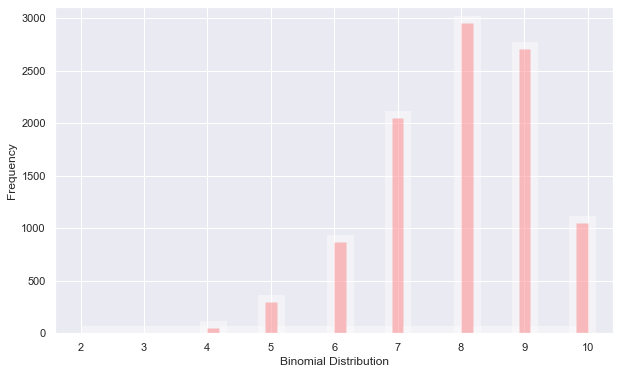

In [9]:
from scipy.stats import binom

binomial_data = binom.rvs(n=10, p=0.8,size=10000)

axis = sns.distplot(binomial_data, kde=False, color='red', hist_kws={"linewidth": 15})
axis.set(xlabel='Binomial Distribution', ylabel='Frequency')

---
# Measures of central tendency

In [12]:
import pandas as pd
import numpy as np 

df = pd.read_csv("data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [13]:
################################################################
# Data cleaning
################################################################

# Find out the number of values which are not numeric
df['price'].str.isnumeric().value_counts()

# List out the values which are not numeric
df['price'].loc[df['price'].str.isnumeric() == False]

#Setting the missing value to mean of price and convert the datatype to integer
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [14]:
# Cleaning the horsepower losses field
df['horsepower'].str.isnumeric().value_counts()
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
df['horsepower'] = df['horsepower'].replace('?',hpmean).astype(int)
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

In [15]:
# Cleaning the Normalized losses field
df[df['normalized-losses']=='?'].count()
nl=df['normalized-losses'].loc[df['normalized-losses'] !='?'].count()
nmean=nl.astype(str).astype(int).mean()
df['normalized-losses'] = df['normalized-losses'].replace('?',nmean).astype(int)
df['normalized-losses'].head()

0    164
1    164
2    164
3    164
4    164
Name: normalized-losses, dtype: int64

In [16]:
# cleaning the bore
# Find out the number of invalid value
df['bore'].loc[df['bore'] == '?']
# Replace the non-numeric value to null and convert the datatype
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')
df.bore.head()

0    3.47
1    3.47
2    2.68
3    3.19
4    3.19
Name: bore, dtype: float64

In [17]:
# Cleaning the column stoke
df['stroke'] = pd.to_numeric(df['stroke'],errors='coerce')
df['stroke'].head()

0    2.68
1    2.68
2    3.47
3    3.40
4    3.40
Name: stroke, dtype: float64

In [18]:
# Cleaning the column peak-rpm 
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors='coerce')
df['peak-rpm'].head()

0    5000.0
1    5000.0
2    5000.0
3    5500.0
4    5500.0
Name: peak-rpm, dtype: float64

In [19]:
# Cleaning the Column num-of-doors data
# remove the records which are having the value '?'
df['num-of-doors'].loc[df['num-of-doors'] == '?']
df= df[df['num-of-doors'] != '?']
df['num-of-doors'].loc[df['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

In [20]:
#calculate mean, median and mode of dat set height
height = df['height']
mean = height.mean()
median =height.median()
mode = height.mode()
print(mean , median, mode)

53.73152709359609 54.1 0    50.8
dtype: float64


In [21]:
height.std()

2.442525704031867

In [22]:
# Statistics for the entire dataset
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,199.000000,199.000000,203.000000,203.000000,201.000000,203.000000,203.000000,203.000000
mean,0.837438,130.147783,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,3.330955,3.254070,10.093202,104.463054,5125.870647,25.172414,30.699507,13241.911330
std,1.250021,35.956490,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,0.274054,0.318023,3.888216,39.612384,479.820136,6.529812,6.874645,7898.957924
min,-2.000000,65.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7781.500000
50%,1.000000,128.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,164.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Text(0.5, 0, 'Make of the cars')

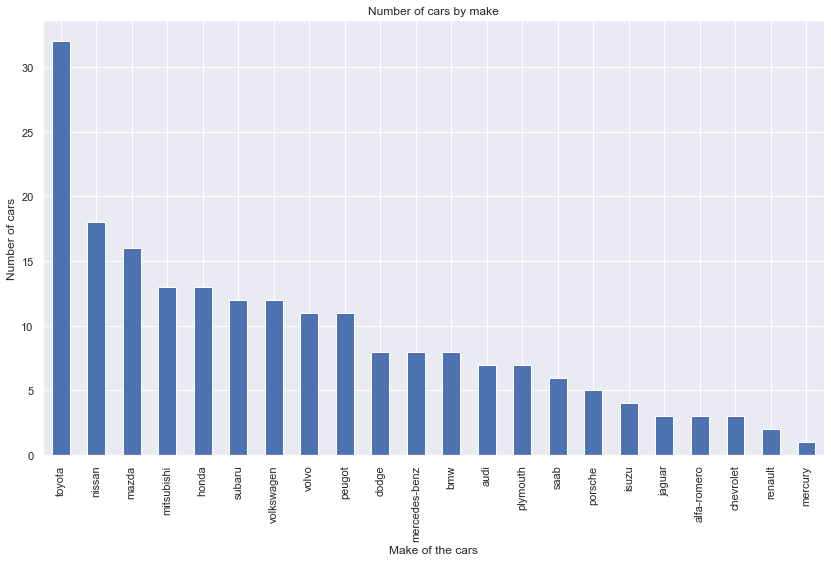

In [23]:
# Non-numeric statistics

df.make.value_counts().nlargest(30).plot(kind='bar', figsize=(14,8))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make of the cars')